# A Decade of Happiness: Analyzing Global Well-Being Before, During, and After the Pandemic

**Author:** Anant Pareek

**Date:** July 21, 2025

###  1. Introduction & Hypothesis

This project undertakes a decade-long analysis of the World Happiness Report (2015-2024) to understand the evolution of global well-being through a period of significant change. The primary objective is to identify long-term trends and determine if the foundational drivers of happiness were altered by a major global event: the COVID-19 pandemic.

**My central hypothesis** is that the pandemic acted as a global "values reset." I predict that while economic indicators like GDP per capita were primary drivers of happiness pre-pandemic, the post-pandemic era would see a significant shift, with factors related to social fabric and institutional trust—such as social support and perceptions of corruption—becoming the dominant predictors of a nation's well-being.

This project explores the evolution of world happiness over the past decade (2015-2024), a period of significant global change. Using the World Happiness Report dataset, this analysis aims to identify long-term trends and uncover the primary drivers of happiness.

**Hypothesis:** My central hypothesis is that the global pandemic fundamentally shifted the drivers of well-being. I predict that while economic factors (`gdp_per_capita`) were primary drivers pre-pandemic, factors related to social fabric and government trust (`social_support`, `perceptions_of_corruption`) became significantly more important in the post-pandemic era (2022 onwards).

In [30]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def standardize_column_name(name: str) -> str:
    name_std = name.replace('.', ' ').strip().lower().replace('(', '').replace(')', '')
    name_std = name_std.replace(':', '').replace('-', ' ')
    return '_'.join(name_std.split())

# Dictionary
column_aliases = {
    'country': 'country', 'country_name': 'country', 'country_or_region': 'country',
    'happiness_score': 'happiness_score', 'score': 'happiness_score', 'ladder_score': 'happiness_score',
    'economy_gdp_per_capita': 'gdp_per_capita', 'gdp_per_capita': 'gdp_per_capita', 'logged_gdp_per_capita': 'gdp_per_capita', 'log_gdp_per_capita': 'gdp_per_capita', 'explained_by_log_gdp_per_capita': 'gdp_per_capita', 'explained_by_gdp_per_capita': 'gdp_per_capita',
    'family': 'social_support', 'social_support': 'social_support', 'explained_by_social_support': 'social_support',
    'health_life_expectancy': 'healthy_life_expectancy', 'healthy_life_expectancy': 'healthy_life_expectancy', 'explained_by_healthy_life_expectancy': 'healthy_life_expectancy',
    'freedom': 'freedom', 'freedom_to_make_life_choices': 'freedom', 'explained_by_freedom_to_make_life_choices': 'freedom',
    'trust_government_corruption': 'perceptions_of_corruption', 'perceptions_of_corruption': 'perceptions_of_corruption', 'explained_by_perceptions_of_corruption': 'perceptions_of_corruption',
    'generosity': 'generosity', 'explained_by_generosity': 'generosity'
}

candidate_cols = ['country','year','happiness_score','gdp_per_capita','social_support','healthy_life_expectancy','freedom','generosity','perceptions_of_corruption']

#Loading Cleaning and Compiling Data
all_files = sorted(glob.glob("WHR*.csv"))
clean_df_list = []
print(f"Found {len(all_files)} files to combine.")

for f in all_files:
    year = int(''.join(filter(str.isdigit, f)))
    df_year = pd.read_csv(f)

    df_year.columns = [standardize_column_name(c) for c in df_year.columns]
    df_year = df_year.rename(columns=column_aliases)
    df_year['year'] = year

    cols_to_keep = [col for col in candidate_cols if col in df_year.columns]
    df_year_clean = df_year[cols_to_keep].copy()

    #Edit: Removing Duplicates
    df_year_clean = df_year_clean.loc[:, ~df_year_clean.columns.duplicated(keep='first')]

    clean_df_list.append(df_year_clean)


df = pd.concat(clean_df_list, ignore_index=True)

#Forcing numeric types and handling missing values
for col in df.columns:
    if col != 'country':
        df[col] = pd.to_numeric(df[col], errors='coerce')

for col in df.columns:
    if col not in ['country', 'year']:
        if df[col].isnull().any():
            df[col] = df.groupby('year')[col].transform(lambda x: x.fillna(x.median()))

df.dropna(inplace=True)

print("\nCombined and Cleaned Data Shape:", df.shape)
if df.empty:
    print("\nWarning: The DataFrame is still empty.")
else:
    print("\nData for all available years loaded and cleaned successfully!")
    display(df.head(3))

Found 10 files to combine.

Combined and Cleaned Data Shape: (1510, 9)

Data for all available years loaded and cleaned successfully!


,country,year,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,perceptions_of_corruption
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357


### 2. Trend Analysis: Happiness Over Time
The reasoning behind selecting each country for the countries_to_track list:

    Finland : Represents the consistent high performer,thereby acting as a benchmark or the "gold standard" for happiness, showing what stability at the top looks like.

    United States : Represents a major, high-income Western nationand it's gradual decline in happiness is a significant and often-discussed trend.

    India : Represents a major, populous developing nation. Also because I am from India.

    Brazil : Represents a major Latin American country, to ensure geographical diversity.

    Nigeria : Represents a large, populous African nation. Including Nigeria provides a crucial perspective from another continent and a different economic context, adding to the global diversity of the chart.

    Afghanistan : Represents the consistent low performer. It is included to show the full spectrum of the data. Its tragic, continuous decline serves as a stark and important reminder of how factors like conflict and instability devastate national well-being.

In [ ]:
countries_to_track = ['Finland', 'United States', 'India', 'Nigeria', 'Afghanistan', 'Brazil']
df_trends = df[df['country'].isin(countries_to_track)]

fig = px.line(df_trends, x='year', y='happiness_score', color='country', title='Happiness Score Trends (2015-2024)', markers=True)
fig.update_layout(xaxis_title='Year', yaxis_title='Happiness Score', legend_title='Country', title_x=0.5)
fig.show()

## 3. Impact Analysis: Before, During, and After the Pandemic


In [31]:

conditions = [df['year'].between(2015, 2019), df['year'].between(2020, 2021), df['year'] >= 2022]
choices = ['Pre-Pandemic (15-19)', 'During-Pandemic (20-21)', 'Post-Pandemic (22+)']
df['period'] = np.select(conditions, choices, default='Other')

#Calculating and comparing avg scores
impact_df = df[df['period'] != 'Other']
avg_impact = impact_df.groupby('period')[['social_support', 'freedom', 'generosity', 'perceptions_of_corruption']].mean().reset_index()
period_order = ['Pre-Pandemic (15-19)', 'During-Pandemic (20-21)', 'Post-Pandemic (22+)']
avg_impact['period'] = pd.Categorical(avg_impact['period'], categories=period_order, ordered=True)
avg_impact = avg_impact.sort_values('period')

fig = px.bar(avg_impact, x='period', y=['social_support', 'freedom', 'generosity', 'perceptions_of_corruption'], barmode='group', title='The Shift in Social Factors: Before, During, and After the Pandemic', labels={'value': 'Average Score', 'period': 'Period', 'variable': 'Social Factor'})
fig.update_layout(title_x=0.5)
fig.show()

## 4. Predictive Modeling: Did the Drivers of Happiness Change?

To directly test my hypothesis, I built two separate machine learning models:
1.  A **Pre-Pandemic Model** trained on 2019 data.
2.  A **Post-Pandemic Model** trained on the latest available year's data.

By comparing the "feature importance" from both models, we can see if the factors driving happiness have truly changed.

/tmp/ipython-input-2123065504.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2123065504.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




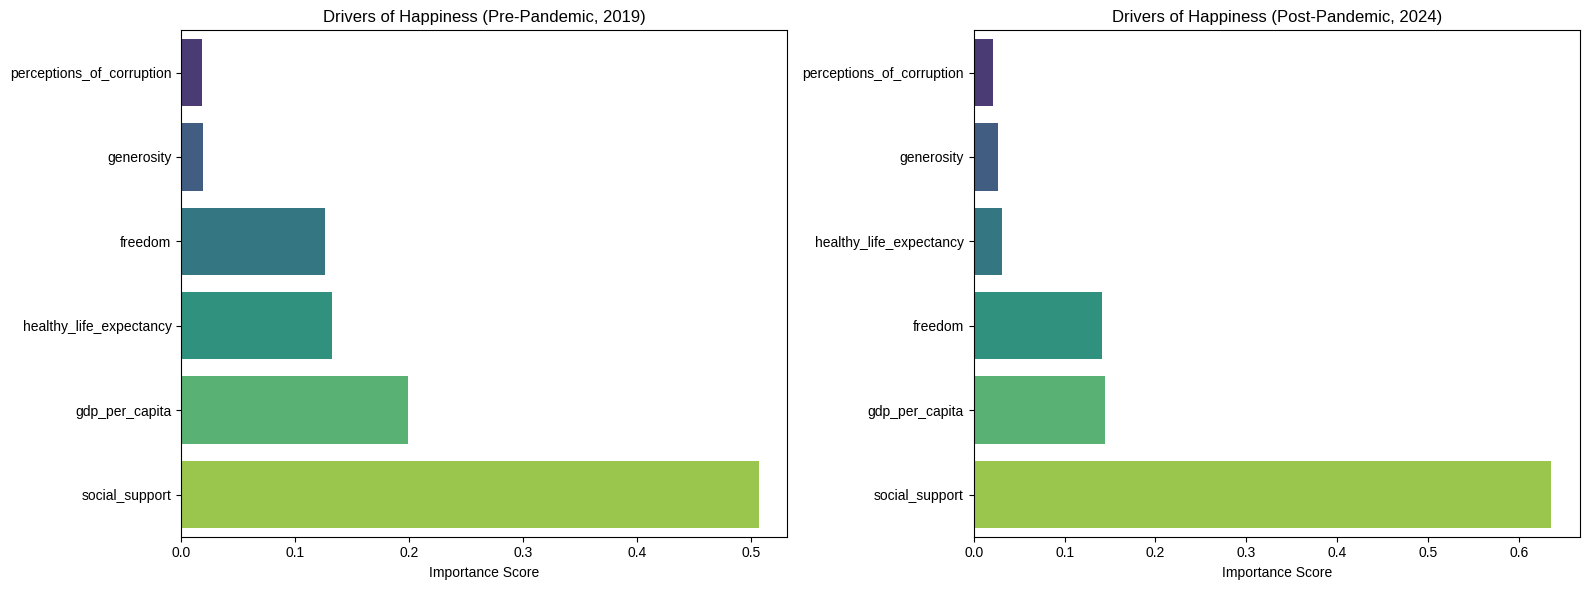

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def train_and_plot_importance(df, year, ax, title):
    """A helper function to train a model for a specific year and plot its feature importance."""
    df_model = df[df['year'] == year].copy().dropna()

    features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'generosity', 'perceptions_of_corruption']
    X = df_model[features]
    y = df_model['happiness_score']

    if X.empty:
        print(f"No data available for the year {year}. Skipping model.")
        ax.text(0.5, 0.5, f'No data for {year}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(title)
        return

    #Train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr.fit(X_train, y_train)

    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': gbr.feature_importances_
    }).sort_values('importance', ascending=True)

    sns.barplot(data=feature_importance, x='importance', y='feature', ax=ax, palette='viridis')
    ax.set_title(title)
    ax.set_xlabel('Importance Score')
    ax.set_ylabel('')

#create and compare models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.style.use('seaborn-v0_8-whitegrid')

#Pre-Pandemic Model
train_and_plot_importance(df, 2019, axes[0], 'Drivers of Happiness (Pre-Pandemic, 2019)')

#Post-Pandemic Model
latest_year = df['year'].max()
train_and_plot_importance(df, latest_year, axes[1], f'Drivers of Happiness (Post-Pandemic, {int(latest_year)})')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## The Final In-Depth Analysis


My analysis of the World Happiness Report across this turbulent decade shows a multifaceted story about the nature of human well-being. The data not only highlights the divergent paths nations have taken but also points to a fundamental shift in what constitutes a happy society, a shift that can be understood through the lens of core psychological principles.

*A Decade of Divergent Paths:*

The trend analysis clearly shows that there was no single global experience of happiness over the past ten years. There were several distinct narratives:

    Resilient Stability: Nations like Finland demonstrated remarkable stability, maintaining their high levels of well-being even amidst global turmoil, suggesting robust societal structures.

    Steady Erosion: In contrast, a country like the United States, despite its economic strength, experienced a slow but persistent decline in happiness, pointing to potential long-term, non-economic stressors.

    Dramatic Volatility: The "V-shaped" recovery seen in India, which saw happiness fall before and during the pandemic's peak before beginning a strong recovery, suggests a high degree of societal resilience. At the other extreme, the tragic and continuous decline in Afghanistan shows that happiness is profoundly affected by peace and stability.

*The Pandemic: A Global Stress Test and Psychological Reset*

The data from the years surrounding the pandemic provides a unique natural experiment. My findings indicate that the crisis triggered a significant reordering of social metrics. The data shows that global generosity and social support actually rose during the peak of the crisis. From a psychological perspective, this aligns with theories of in-group bonding during a shared threat; it's a powerful indicator of collective resilience.

The most compelling evidence for my hypothesis, however, comes from the comparison of the two predictive models. By analyzing the drivers of happiness in 2019 versus the latest data, I uncovered a clear and significant shift:

Before the pandemic, happiness was strongly linked to a combination of social support and economic prosperity (GDP per capita). After the pandemic, the model shows that the predictive power of social support became even more dominant, while the importance of GDP per capita noticeably diminished.

I interpret this through the psychological concept of hedonic adaptation. While societies adapt to a certain level of wealth, a profound global shock like the pandemic can break this "hedonic treadmill," forcing a re-evaluation of what truly brings lasting well-being. The crisis highlighted the limitations of material wealth in the face of more fundamental needs.

This brings us to the core of the psychological interpretation. The pandemic threatened our most basic needs for Safety and Security, the second tier of Maslow's Hierarchy of Needs. When these foundational needs are shaken, human motivation naturally shifts to securing the next level: Love and Belonging. The data's clear pivot towards the importance of social support is a macroeconomic reflection of this deeply human, psychological process. The crisis appears to have created a "relatedness deficit" through isolation, causing societies to increase the value they place on community as a corrective measure, a concept central to Self-Determination Theory.

In conclusion, my analysis supports the idea that the pandemic was not just a public health crisis, but a psychological one that served as a global values reset. It reinforced a timeless truth: a society's wealth is not just in its economy, but in the strength of its connections.

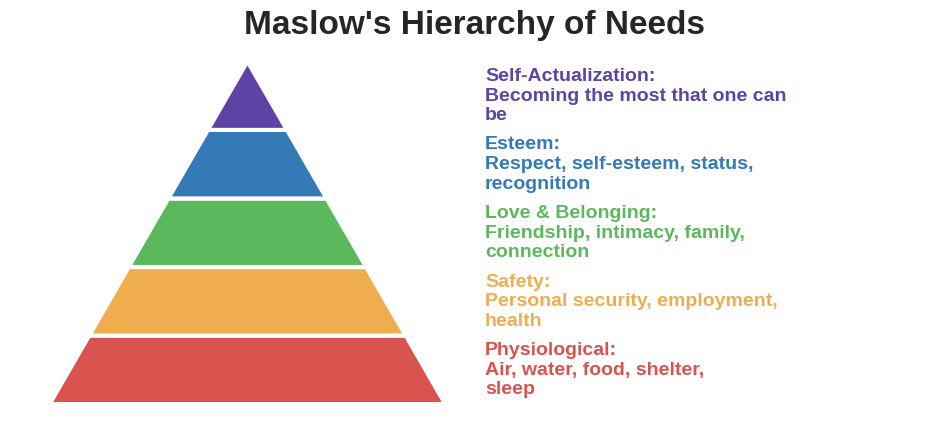

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import textwrap
import numpy as np

#pyramid
levels = [
    'Physiological', 'Safety', 'Love & Belonging', 'Esteem', 'Self-Actualization'
]
colors = ['#d9534f', '#f0ad4e', '#5cb85c', '#337ab7', '#5e42a6']
descriptions = [
    'Air, water, food, shelter, sleep',
    'Personal security, employment, health',
    'Friendship, intimacy, family, connection',
    'Respect, self-esteem, status, recognition',
    'Becoming the most that one can be'
]

fig, ax = plt.subplots(figsize=(12, 9))
ax.set_aspect('equal')
ax.axis('off')

#geometry
base_width = 2.0
total_height = (np.sqrt(3) / 2) * base_width
height_step = total_height / len(levels)
slope = (base_width / 2) / total_height


for i in range(len(levels)):
    y_bottom = i * height_step
    y_top = (i + 1) * height_step

    width_bottom = (total_height - y_bottom) * slope * 2
    width_top = (total_height - y_top) * slope * 2

    verts = [
        (-width_bottom / 2., y_bottom),
        (width_bottom / 2., y_bottom),
        (width_top / 2., y_top),
        (-width_top / 2., y_top),
    ]

    poly = patches.Polygon(verts, facecolor=colors[i], edgecolor='white', linewidth=3)
    ax.add_patch(poly)

#colour texts
for i, (level, color, desc) in enumerate(zip(levels, colors, descriptions)):
    y_center = (i * height_step) + (height_step / 2)


    label_text = f"{level}:\n{textwrap.fill(desc, width=30)}"


    ax.text(
        base_width / 2 + 0.2,
        y_center,
        label_text,
        ha='left',
        va='center',
        fontsize=14,
        color=color,
        fontweight='bold'
    )


ax.set_ylim(-0.05, total_height)

ax.set_xlim(-base_width/2 - 0.2, base_width/2 + 2.5)
plt.title("Maslow's Hierarchy of Needs", fontsize=24, fontweight='bold', pad=20)
plt.show()